# Homework 5, Daniil Glukhovskiy

## Problem 3

### Getting/processing data (adapted from textbook)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#2018 year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("From",lgdates[0],"to",lgdates[-1],"(",len(lgdates),"observations):")
print("\nMeans:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')

From 1971-01-05 to 2019-12-31 ( 12285 observations):

Means: [ 1.2022 -0.4963  0.9699] bps/day
(CHF, GBP, JPY)

   [0.5113 0.2451 0.2175]
C= [0.2451 0.3551 0.1144]     (4.20)
   [0.2175 0.1144 0.4094]
(%/day)² units


In [21]:
#invert the c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci=np.linalg.inv(c)
print("          ",ci[0]/10000)
print(f'C-inverse=',ci[1]/10000,"    (4.21)")
print("          ",ci[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')
#sum entries in ci
#compute quantities in order to use formula 4.30
uciu=np.sum(ci)
print(f'u\'(C-inverse)u =',uciu/10000,
      f'(days/%)\N{SUPERSCRIPT TWO}')

ucim=np.sum(np.matmul(ci,m))
print(f'u\'(C-inverse)m =',ucim,
      'days')

           [ 3.4417 -1.9638 -1.2796]
C-inverse= [-1.9638  4.2154 -0.1344]     (4.21)
           [-1.2796 -0.1344  3.1596]
(days/%)² units
u'(C-inverse)u = 4.061025866844458 (days/%)²
u'(C-inverse)m = 0.8804682829059165 days


### Run simulations for every month

In [22]:
#recompute tangency portfolio for the check. 
#expect to get w_tp = [8.119, (-1)*10.1086, 2.9896]
rfrate=10**(-5)
rfvec=[rfrate]*3
w_tp=np.matmul(ci,m-rfvec)/(ucim-rfrate*uciu)
print('Tangency portfolio:',w_tp)

Tangency portfolio: [  8.119  -10.1086   2.9896]


In [23]:
#break data into months
#month_start = list of indices of entries corresponding to first date of each month
from datetime import date
lgdates_new = [date.fromisoformat(i) for i in lgdates]
month_start = [0]
for i in range(len(lgdates_new)-1):
    if lgdates_new[i].month != lgdates_new[i+1].month:
        month_start.append(i+1)
len(month_start)

588

In [24]:
# adjust rates so all are in units currency/dollar

adj_ratematrix = [[x[0], 1/x[1], x[2]] for x in ratematrix]

In [25]:
#run simulation for every month
profit = []
bankrupcies = 0
for i in range(len(month_start)):
    start = month_start[i]
    while np.isnan(adj_ratematrix[start]).any():
        start += 1
    if i == len(month_start) - 1:
        end = len(lgdates)
    else:
        end = month_start[i+1]
    portfolio = np.multiply(w_tp, adj_ratematrix[start])
    for j in range(start, end):
        if not np.isnan([1/x for x in adj_ratematrix[j]]).any():
            portfolio_value = np.dot(portfolio, np.array([1/x for x in adj_ratematrix[j]]))
            if portfolio_value <= 0:
                bankrupcies += 1
                break
    profit.append(portfolio_value - 1)

In [26]:
print('We went bankrupt %.1d dtimes'% bankrupcies)
print('Worst month:', lgdates[month_start[profit.index(min(profit))]],'to', lgdates[-1 + month_start[1 + profit.index(min(profit))]])
print('At this month our loss was %.1f %%.' % (-min(profit)*100))

We went bankrupt 0 dtimes
Worst month: 2010-08-02 to 2010-08-31
At this month our loss was 85.2 %.


## Problem 4

### Data import and processing (adapted from textbook)

In [27]:
#Get 3 currencies until the end of
#2018 year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday='2018-12-31'
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("From",lgdates[0],"to",lgdates[-1],"(",len(lgdates),"observations):")
print("\nMeans:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')

From 1971-01-05 to 2018-12-31 ( 12036 observations):

Means: [ 1.2138 -0.5389  0.9821] bps/day
(CHF, GBP, JPY)

   [0.5194 0.2494 0.2207]
C= [0.2494 0.3568 0.1166]     (4.20)
   [0.2207 0.1166 0.4155]
(%/day)² units


In [28]:
#invert the c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci=np.linalg.inv(c)
print("          ",ci[0]/10000)
print(f'C-inverse=',ci[1]/10000,"    (4.21)")
print("          ",ci[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')

           [ 3.4048 -1.9702 -1.2556]
C-inverse= [-1.9702  4.226  -0.1393]     (4.21)
           [-1.2556 -0.1393  3.113 ]
(days/%)² units


In [29]:
#sum entries in ci
#compute quantities in order to use formulae 4.15, 4.18, 4.19
uciu=np.sum(ci)
print(f'u\'(C-inverse)u =',uciu/10000,
      f'(days/%)\N{SUPERSCRIPT TWO}')

ucim=np.sum(np.matmul(ci,m))
print(f'u\'(C-inverse)m =',ucim,
      'days')
mcim=np.matmul(m,np.matmul(ci,m))
print(f'm\'(C-inverse)m =',mcim*10000,
      'bps')

u'(C-inverse)u = 4.013520703645339 (days/%)²
u'(C-inverse)m = 0.7639500543759743 days
m'(C-inverse)m = 8.977995216452298 bps


In [30]:
#Vectors for equation 4.15
u=[1]*3
vec2=np.matmul(ci,u)/uciu
vec1=np.subtract(np.matmul(ci,m),vec2*ucim)
print(f"w'=lambda",vec1,"+",vec2,"    (4.15)#")

lambdacoeff=(uciu*mcim-ucim*ucim)/uciu
constmu=ucim/uciu
print(f'mu=(lambda *',lambdacoeff*10000,")+",constmu*10000," bps/day    (4.18)#")

print(f'sigma=sqrt(lambda\N{SUPERSCRIPT TWO} *',lambdacoeff*10000,'+', \
      10000/uciu,') (%/day)   (4.19)#')

w'=lambda [ 3.9275 -5.2086  1.2812] + [0.0446 0.5273 0.4281]     (4.15)#
mu=(lambda * 8.832581817923925 )+ 0.19034411699486328  bps/day    (4.18)#
sigma=sqrt(lambda² * 8.832581817923925 + 0.24915780279686497 ) (%/day)   (4.19)#


### Efficient frontier for 1971 - 2018 data

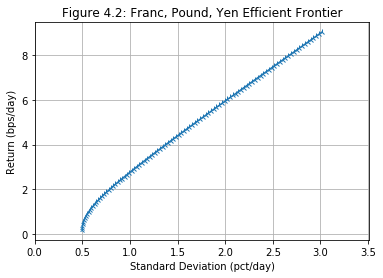

In [31]:
#Draw graph of simple efficient frontier
lambda1s=np.arange(0,1.01,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply * 100 for percent/day units
yreturn=10000*(lambdacoeff*lambda1s+constmu)        #Multiply * 10000 for bp units

plt.figure(1)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.2: Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show();

### Efficient portfolios for small values of lambda

In [32]:
#compute efficient portfolios with lambda1 = 0,0.01,0.02,...,0.1
lambda1s = np.arange(0,0.11,0.01)
eff_ports = [(i, i*vec1 + vec2) for i in lambda1s]
for i in range(11):
    print('portfolio =', eff_ports[i][1], ',lambda = %.2f, sigma = %.4f (%%/day)'%
          (lambda1s[i],np.sqrt(lambda1s[i]**2*lambdacoeff*10000 + 10000/uciu)))

portfolio = [0.0446 0.5273 0.4281] ,lambda = 0.00, sigma = 0.4992 (%/day)
portfolio = [0.0839 0.4752 0.4409] ,lambda = 0.01, sigma = 0.5000 (%/day)
portfolio = [0.1231 0.4232 0.4537] ,lambda = 0.02, sigma = 0.5027 (%/day)
portfolio = [0.1624 0.3711 0.4665] ,lambda = 0.03, sigma = 0.5071 (%/day)
portfolio = [0.2017 0.319  0.4793] ,lambda = 0.04, sigma = 0.5131 (%/day)
portfolio = [0.241  0.2669 0.4921] ,lambda = 0.05, sigma = 0.5208 (%/day)
portfolio = [0.2802 0.2148 0.5049] ,lambda = 0.06, sigma = 0.5301 (%/day)
portfolio = [0.3195 0.1627 0.5178] ,lambda = 0.07, sigma = 0.5408 (%/day)
portfolio = [0.3588 0.1106 0.5306] ,lambda = 0.08, sigma = 0.5529 (%/day)
portfolio = [0.3981 0.0586 0.5434] ,lambda = 0.09, sigma = 0.5663 (%/day)
portfolio = [0.4373 0.0065 0.5562] ,lambda = 0.10, sigma = 0.5809 (%/day)


### Retrieving and processing the same data for 2019

In [33]:
#Same data for 2019
lastday=qf.LastYearEnd()
startday = '2019-01-01'
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,startdate=startday, enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d_2019=np.array(difflgs)
m_2019=np.mean(d_2019,axis=0)
c_2019=np.cov(d_2019.T)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("From",lgdates[0],"to",lgdates[-1],"(",len(lgdates),"observations):")
print("\nMeans:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')

From 2019-01-03 to 2019-12-31 ( 248 observations):

Means: [ 1.2138 -0.5389  0.9821] bps/day
(CHF, GBP, JPY)

   [0.5194 0.2494 0.2207]
C= [0.2494 0.3568 0.1166]     (4.20)
   [0.2207 0.1166 0.4155]
(%/day)² units


In [34]:
#invert the 2019 c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci_2019=np.linalg.inv(c_2019)
print("          ",ci_2019[0]/10000)
print(f'C-inverse=',ci_2019[1]/10000,"    (4.21)")
print("          ",ci_2019[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')

           [12.6715 -1.3576 -6.8637]
C-inverse= [-1.3576  3.8911  0.3953]     (4.21)
           [-6.8637  0.3953 12.1467]
(days/%)² units


### Computing variances of portfolios on 2019 data

In [35]:
#variance_old - variance of efficient portfolios based on 1971-2018 data.
#variance_2019 - variance of efficient portfolios based on 2019 data.

for w in eff_ports:
    print(f'lambda=%.2f, variance_old=%.4f (%%/day)\N{SUPERSCRIPT TWO}, variance_2019=%.4f (%%/day)\N{SUPERSCRIPT TWO}'
          % (w[0], 10000*np.matmul(w[1],np.matmul(c,w[1])), 10000*np.matmul(w[1],np.matmul(c_2019,w[1]))))

lambda=0.00, variance_old=0.2492 (%/day)², variance_2019=0.1056 (%/day)²
lambda=0.01, variance_old=0.2500 (%/day)², variance_2019=0.0966 (%/day)²
lambda=0.02, variance_old=0.2527 (%/day)², variance_2019=0.0894 (%/day)²
lambda=0.03, variance_old=0.2571 (%/day)², variance_2019=0.0838 (%/day)²
lambda=0.04, variance_old=0.2633 (%/day)², variance_2019=0.0799 (%/day)²
lambda=0.05, variance_old=0.2712 (%/day)², variance_2019=0.0776 (%/day)²
lambda=0.06, variance_old=0.2810 (%/day)², variance_2019=0.0771 (%/day)²
lambda=0.07, variance_old=0.2924 (%/day)², variance_2019=0.0782 (%/day)²
lambda=0.08, variance_old=0.3057 (%/day)², variance_2019=0.0810 (%/day)²
lambda=0.09, variance_old=0.3207 (%/day)², variance_2019=0.0855 (%/day)²
lambda=0.10, variance_old=0.3375 (%/day)², variance_2019=0.0917 (%/day)²


Variances in 2019 are approximately 2-4 times smaller then those computed from older data. This could mean that the market in 2019 was more stable (i.e. because previous period includes large financial falls and rises).